In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt          
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline     
sns.set(color_codes=True)
colors = ['red', 'royalblue','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [2]:
df = pd.read_csv('./bank-additional-full.csv', sep=';')

In [3]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 41188 rows.


In [4]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

In [5]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

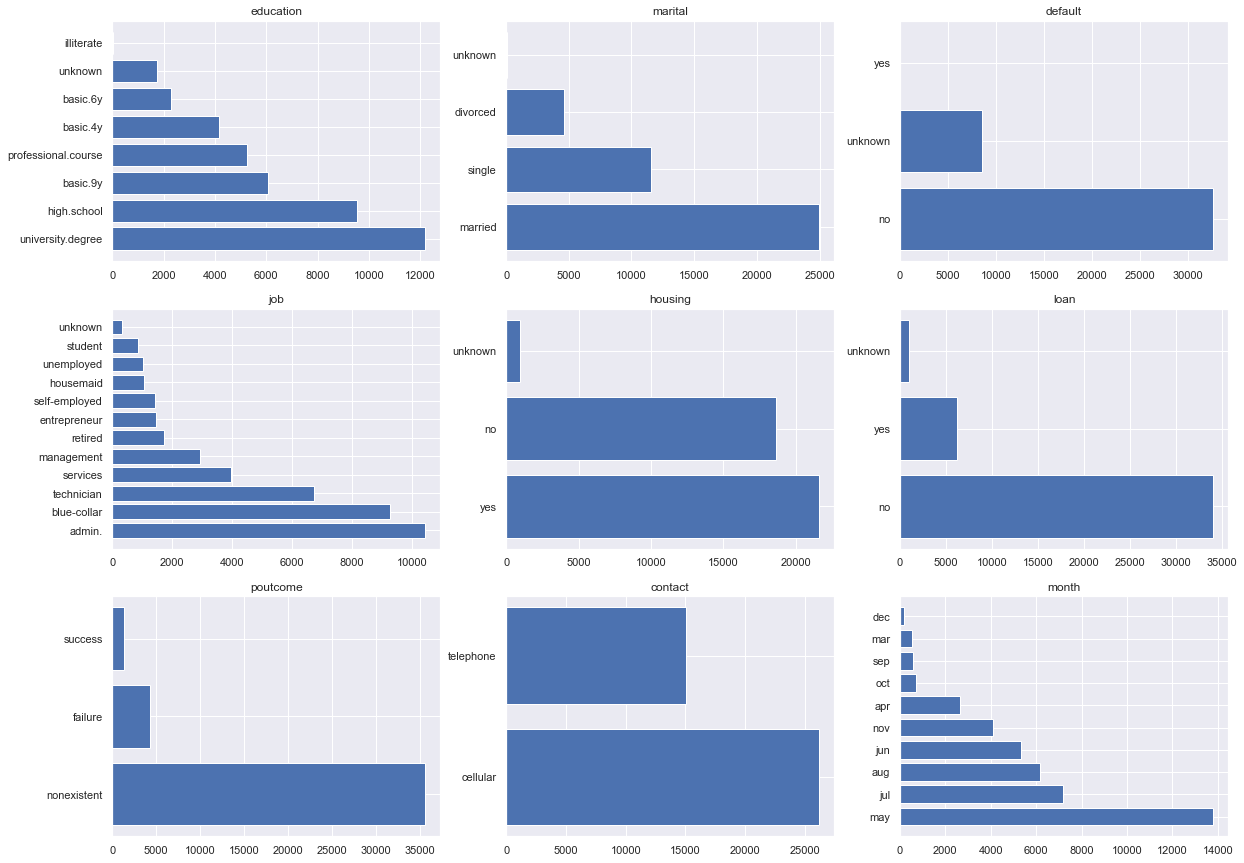

In [10]:
cat_columns = ['education', 'marital', 'default', 'job', 'housing', 'loan', 'poutcome', 'contact', 'month',]

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].barh(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    counter += 1

plt.show()

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

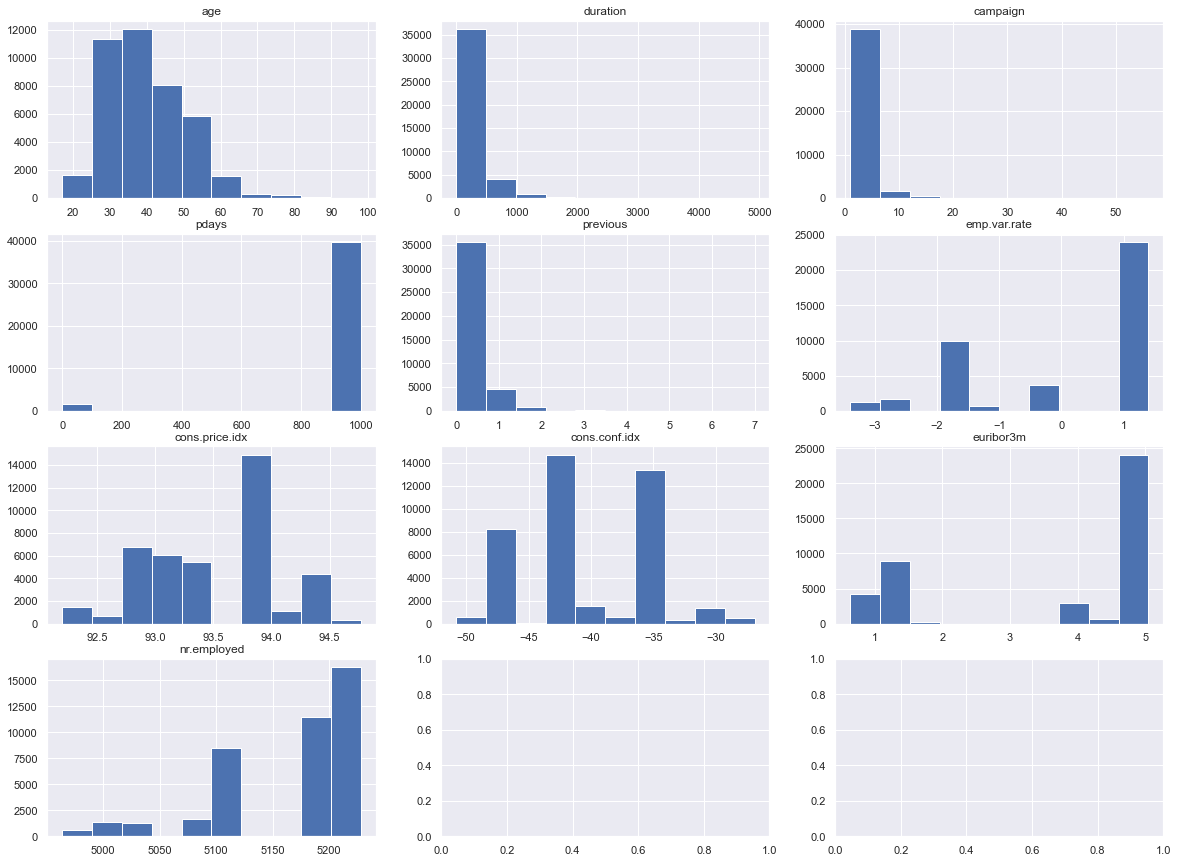

In [12]:
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

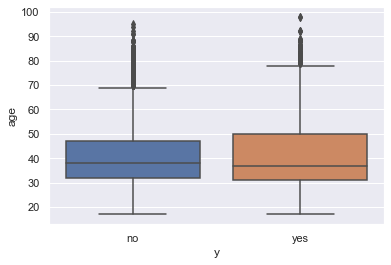

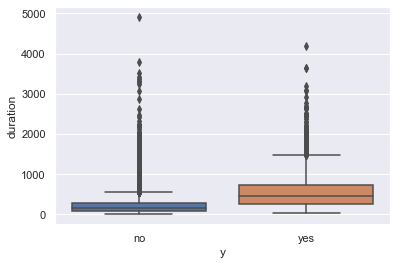

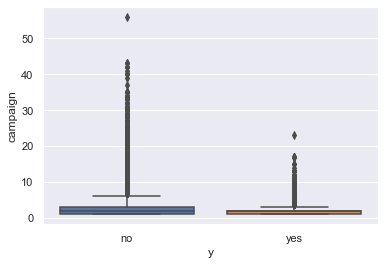

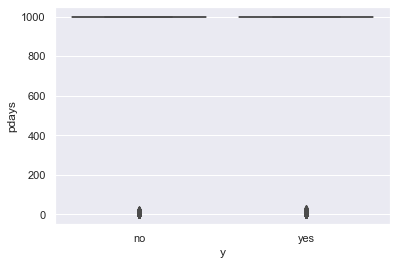

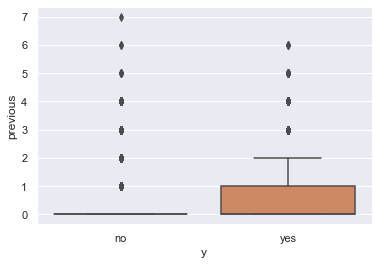

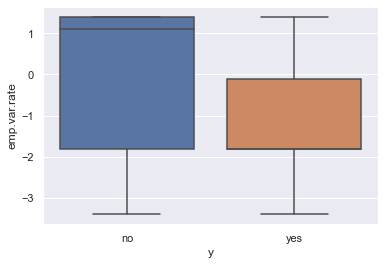

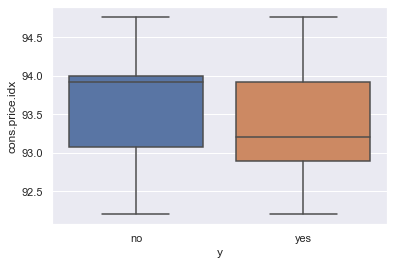

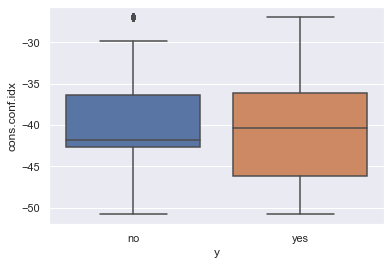

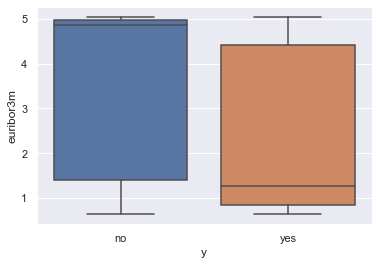

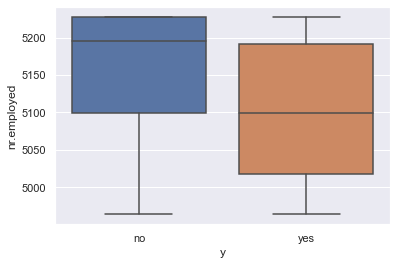

In [13]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
y1 = df['y']

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df)
  plt.show();

In [14]:
cat_var=[i for i in df.columns if i not in num_var]

y1 = y1.values

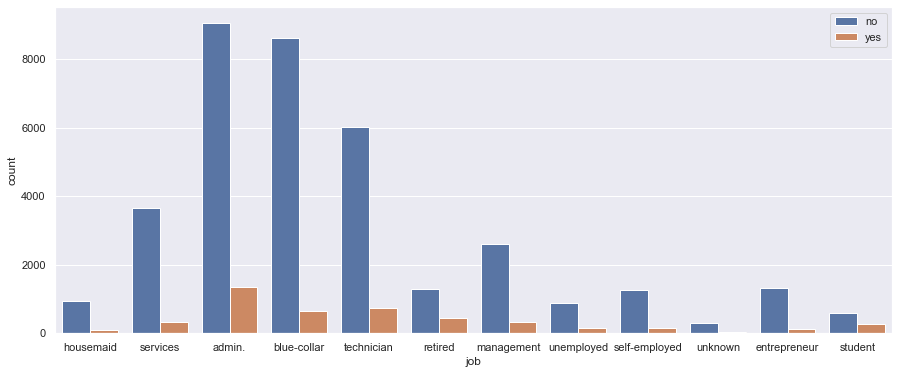

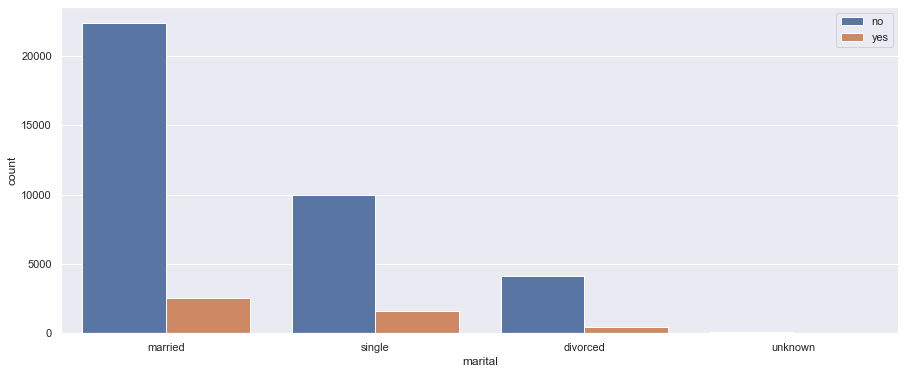

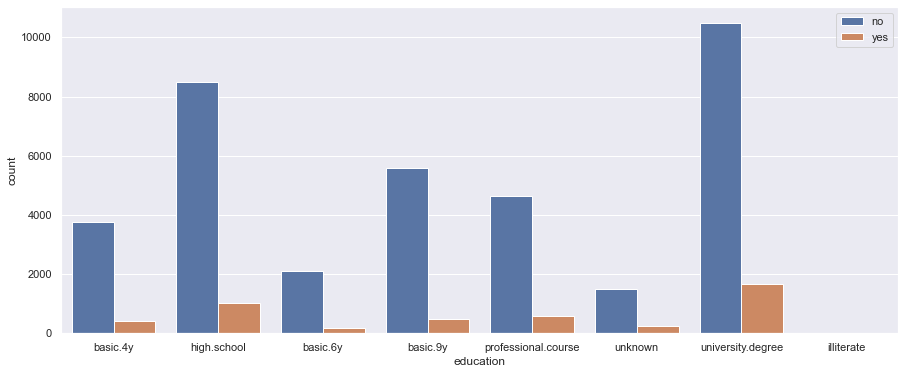

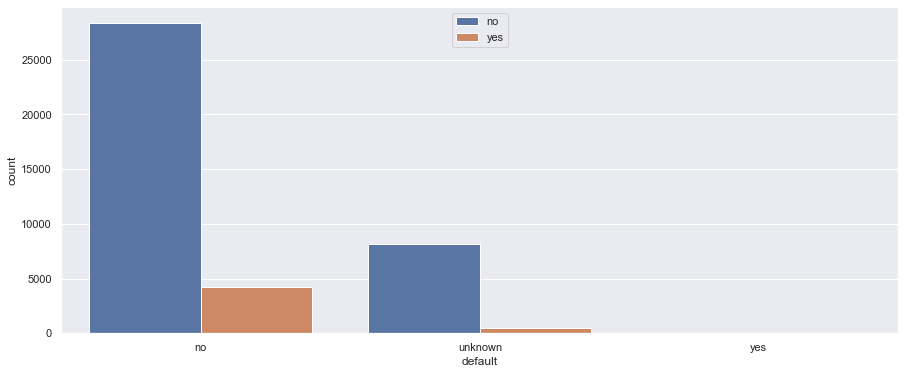

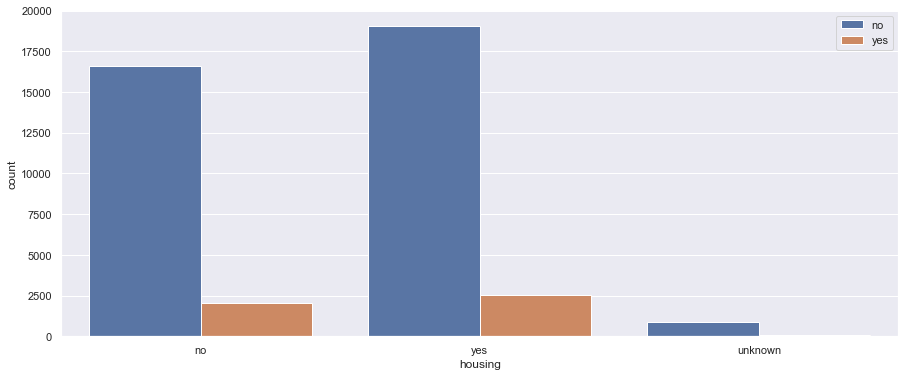

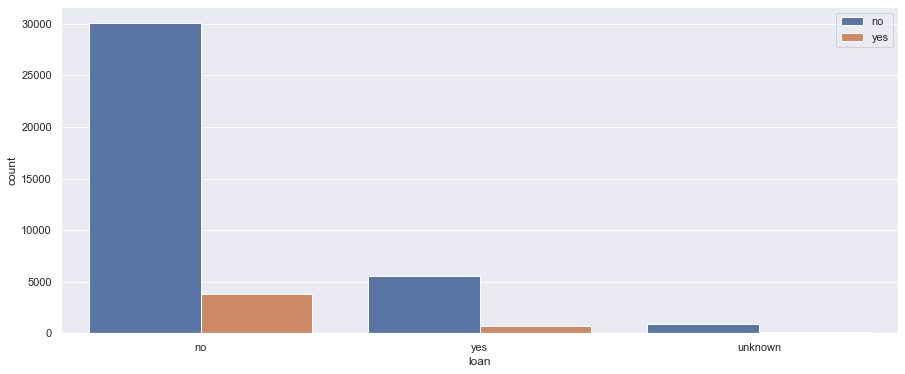

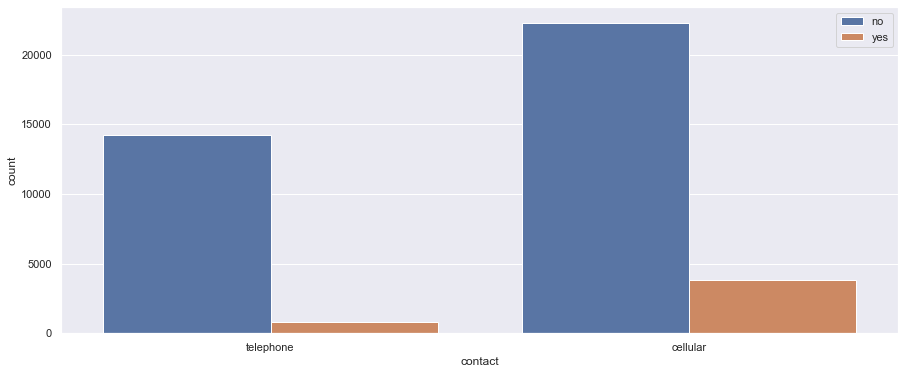

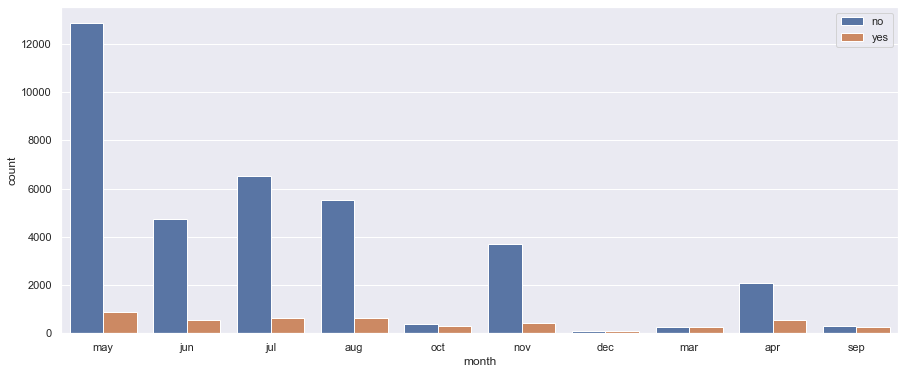

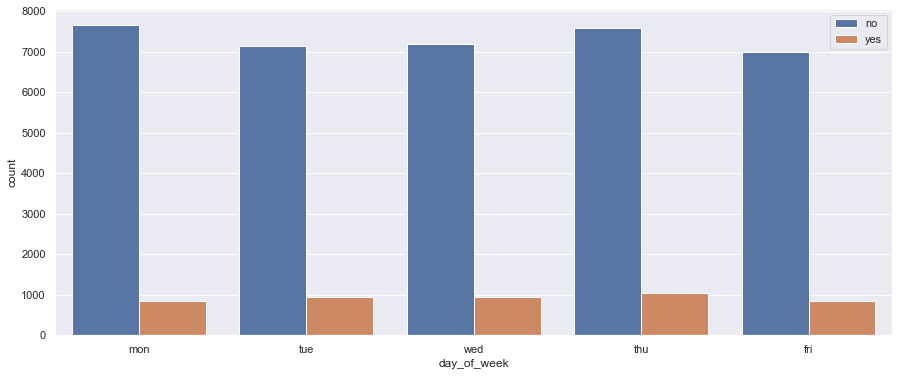

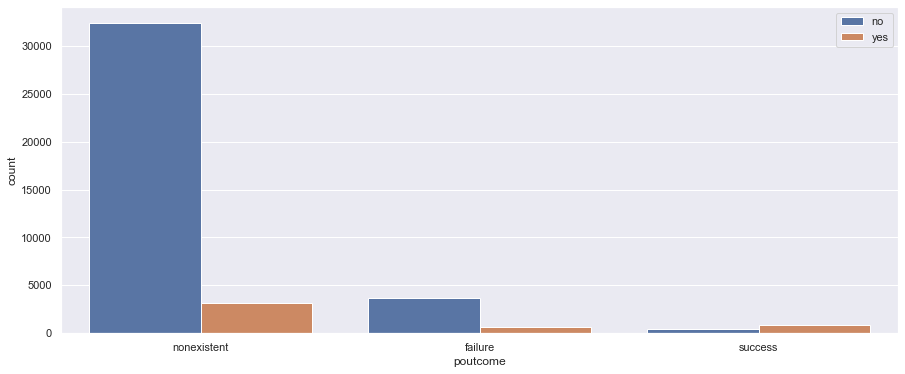

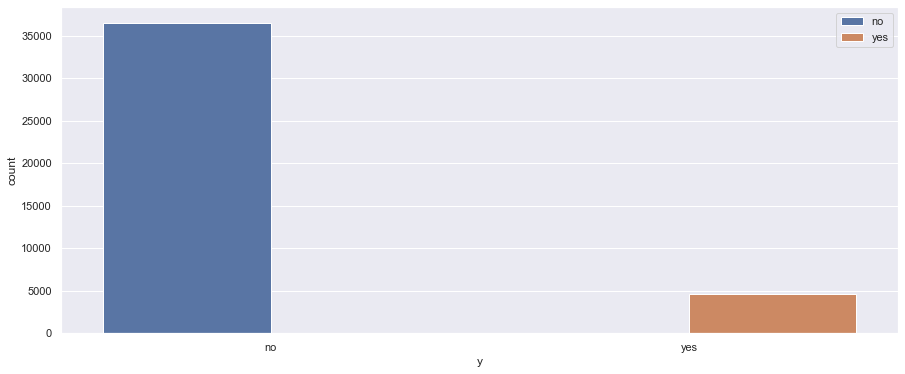

In [15]:
#Exploratory Data Analysis for categorical variable

for i in cat_var:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, hue=y1, data=df)
    plt.show()

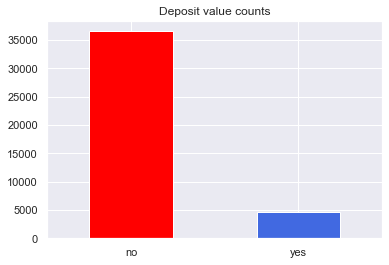

In [16]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts', color=colors, rot=0);

In [17]:
df1 = pd.read_csv('./bank-additional-full.csv', sep=';')

In [18]:
df1['y'] = pd.factorize(df['y'])[0]
df1['education'] = pd.factorize(df['education'])[0]
df1['job'] = pd.factorize(df['job'])[0]
df1['housing'] = pd.factorize(df['housing'])[0]
df1['loan'] = pd.factorize(df['loan'])[0]
df1['marital'] = pd.factorize(df['marital'])[0]
df1['default'] = pd.factorize(df['default'])[0]
df1['contact'] = pd.factorize(df['contact'])[0]
df1['day_of_week'] = pd.factorize(df['day_of_week'])[0]
df1['poutcome'] = pd.factorize(df['poutcome'])[0]
df1['month'] = pd.factorize(df['month'])[0]

In [20]:
df1.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

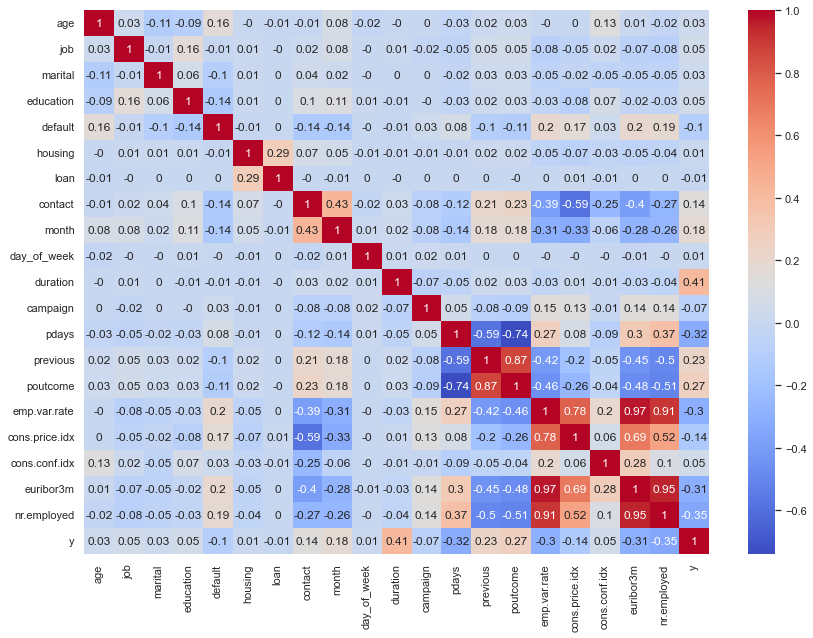

In [21]:
plt.figure(figsize=(14,10))
c= df1.corr().round(2)
sns.heatmap(c, cmap="coolwarm",annot=True);

In [28]:
# df['deposit_bool'] = pd.factorize(df['y'])[0]

In [29]:
# #introduce new column 'age_buckets' to  ''
# df['age_buckets'] = pd.qcut(df['age'], 20, labels=False, duplicates = 'drop')

# #group by 'balance_buckets' and find average campaign outcome per balance bucket
# mean_age = df.groupby(['age_buckets'])['deposit_bool'].mean()

# #plot
# plt.plot(mean_age.index, mean_age.values)
# plt.title('Mean % subscription depending on age')
# plt.xlabel('age bucket')
# plt.ylabel('% subscription')
# plt.show()

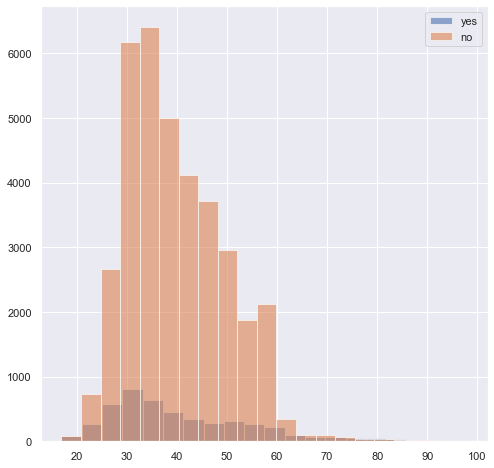

In [30]:
plt.figure(figsize=(8, 8))

plt.hist(df[df["y"]=='yes']['age'].reset_index(drop=True), alpha=0.6, label='yes', bins=20)
plt.hist(df[df["y"]=='no']['age'].reset_index(drop=True), alpha=0.6, label='no', bins =20)

plt.legend()
plt.show()

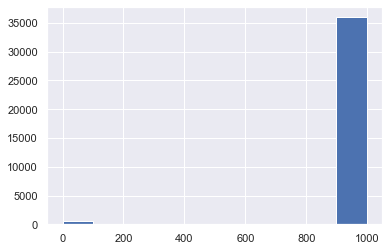

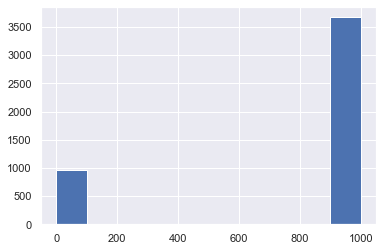

In [31]:
plt.hist(df[df['y'] == 'no']['pdays'])
plt.show()
plt.hist(df[df['y'] == 'yes']['pdays'])
plt.show()
# df[df['y'] == 1]

In [32]:
import plotly.express as px 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df1)
pca = PCA(n_components=2) 
components = pca.fit_transform(X) 
fig = px.scatter(components, x=0, y=1, color=df1['y']) 
fig.show()

In [33]:
X = df1.iloc[:,0:20]
y = df1.iloc[:, 20]

In [34]:
lda.explained_variance_ratio_

array([1.])

In [106]:
sns.set()

ALGORITHM_NAME = 'lda'

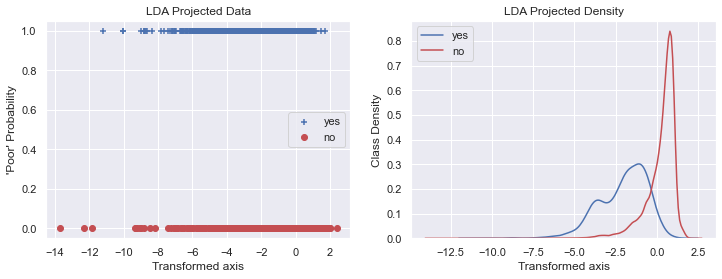

In [107]:
model = LinearDiscriminantAnalysis()
X_lda = model.fit(X, y).transform(X)

mask = (y == 1)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].scatter(X_lda[mask], y[mask], color='b', marker='+', label='yes')
axes[0].scatter(X_lda[~mask], y[~mask], color='r', marker='o', label='no')
axes[0].set_title('LDA Projected Data')
axes[0].set_xlabel('Transformed axis')
axes[0].set_ylabel('\'Poor\' Probability')
axes[0].legend()

sns.kdeplot(np.ravel(X_lda[mask]), color='b', ax=axes[1], label='yes')
sns.kdeplot(np.ravel(X_lda[~mask]), color='r', ax=axes[1], label='no')
axes[1].set_title('LDA Projected Density')
axes[1].set_xlabel('Transformed axis')
axes[1].set_ylabel('Class Density')
axes[1].legend()
plt.show()

In [109]:
def get_corrs_df(X, model):
    """ For a given feature matrix and LDA model, return
        the correlation of the LDA transformation and
        each feature. Also return the absolute value of
        the correlation.
    """
    X_lda = (model.transform(X)
                  .flatten())
    
    # extract single value from 2x2 correlation matrix
    calc_corr = lambda col: np.corrcoef(col, X_lda)[0, 1]
    
    corrs = (X.apply(calc_corr, axis=0)
               .to_frame())
    corrs.columns = ['correlation']
    
    # add absolute value column
    corrs['abs'] = corrs.correlation.apply(abs)
    
    return corrs.sort_values('abs', ascending=False)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

corrs = get_corrs_df(X_train, model)
feats = corrs[corrs['abs'] > 0.15].index.values

In [111]:
corrs

correlation       abs
duration          -0.663519  0.663519
nr.employed        0.617876  0.617876
pdays              0.577982  0.577982
euribor3m          0.537653  0.537653
emp.var.rate       0.521136  0.521136
poutcome          -0.484184  0.484184
previous          -0.408123  0.408123
month             -0.302511  0.302511
contact           -0.250010  0.250010
cons.price.idx     0.234639  0.234639
default            0.171610  0.171610
campaign           0.115780  0.115780
cons.conf.idx     -0.097852  0.097852
education         -0.087947  0.087947
job               -0.086050  0.086050
age               -0.053536  0.053536
marital           -0.046111  0.046111
loan               0.027881  0.027881
day_of_week       -0.009818  0.009818
housing           -0.005210  0.005210

In [112]:
X_train[feats]

duration  nr.employed  pdays  euribor3m  emp.var.rate  poutcome  \
18827       104       5228.1    999      4.970           1.4         0   
27885        58       5099.1    999      1.556          -1.8         0   
905         245       5191.0    999      4.856           1.1         0   
34947       148       5099.1    999      1.250          -1.8         0   
18098       244       5228.1    999      4.963           1.4         0   
...         ...          ...    ...        ...           ...       ...   
20757       559       5228.1    999      4.965           1.4         0   
32103       166       5099.1    999      1.313          -1.8         0   
30403       427       5099.1    999      1.365          -1.8         0   
21243       111       5228.1    999      4.963           1.4         0   
2732        132       5191.0    999      4.859           1.1         0   

       previous  month  contact  cons.price.idx  default  
18827         0      3        1          93.444        0  
27885         0      7        0          92.843        0  
905           0      0        0          93.994        0  
34947         0      0        1          92.893        0  
18098         0      2        1          93.918        1  
...         ...    ...      ...             ...      ...  
20757         0      3        1          93.444        0  
32103         0      0        1          92.893        0  
30403         0      8        1          93.075        0  
21243         0      3        1          93.444        0  
2732          0      0        0          93.994        0  

[8237 rows x 11 columns]

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

max_score = 0
f1 = 1
f1_scores = []
f1_threshold = 0.8
X_train = X_train[feats]
X_test = X_test[feats]

while (f1 > f1_threshold) & (X_train.shape[1] >= 1):
    # Fit the model
    estimator = LinearDiscriminantAnalysis()
    parameters = {'solver': ['svd']}
    model = GridSearchCV(estimator, parameters).fit(X_train, y_train)
    
    # Get feature correlations
    corrs = get_corrs_df(X_train, model)
    feats = corrs.sort_values('abs', ascending=False).index.values

    # Run the model
    y_pred = model.predict(X_test[X_train.columns])
    y_prob = model.predict_proba(X_test[X_train.columns])[:,1]

    # Compare f1 score to threshold
    f1 = f1_score(y_test, y_pred)
    if f1 > max_score:
        max_score = f1
        best_feats = X_train.columns
        
    if f1 > f1_threshold:
        # Drop feature with lowest coefficient
        X_train.drop(feats[-1], axis=1, inplace=True)
        print("n: {}, f1: {}, lowest coef: {}".format(len(feats), f1, feats[-1]))

In [117]:
# from sklearn.metrics import confusion_matrix

# confusion_mtx = confusion_matrix(y_test, y_pred)
# sns.heatmap(confusion_mtx, square=True, annot=True, fmt='d', cbar=True);

In [114]:
feats

array(['duration', 'nr.employed', 'pdays', 'euribor3m', 'emp.var.rate',
       'poutcome', 'previous', 'month', 'cons.price.idx', 'contact',
       'default'], dtype=object)

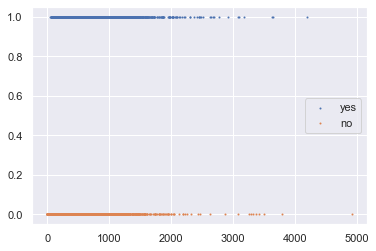

In [175]:
plt.scatter(X['duration'][mask], y[mask], label='yes', s = 1)
plt.scatter(X['duration'][~mask], y[~mask], label='no', s = 1)
plt.legend()
plt.show()

<AxesSubplot:ylabel='Density'>

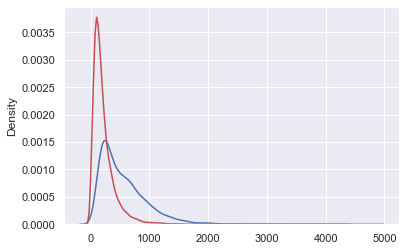

In [179]:
sns.kdeplot(np.ravel(X['duration'][mask]), color='b', label='yes')
sns.kdeplot(np.ravel(X['duration'][~mask]), color='r', label='no')

<AxesSubplot:ylabel='Density'>

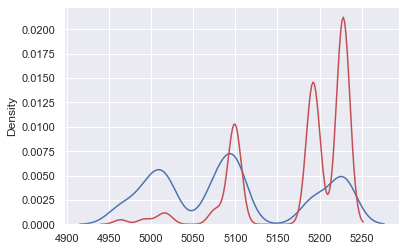

In [180]:
sns.kdeplot(np.ravel(X['nr.employed'][mask]), color='b', label='yes')
sns.kdeplot(np.ravel(X['nr.employed'][~mask]), color='r', label='no')